# Se mettre dans le dossier parent

In [1]:
import os
current_dir = %pwd
project_dir = os.path.dirname(current_dir)
%cd $project_dir

c:\Users\ayoub\OneDrive\Bureau\Datascientest_project\doc-classifier


In [2]:
from src import compute_color_histogram

# DATAFRAME CSV de données 

In [3]:
import pandas as pd
import cv2
import matplotlib.pyplot as plt 
import seaborn as sns

# Construire le chemin complet du fichier CSV en utilisant os.path.join
csv_file_path = os.path.join(project_dir, 'data', 'image_info_labeled.csv')
# Lire le fichier CSV en utilisant pd.read_csv
df = pd.read_csv(csv_file_path)

# Afficher les premières lignes du DataFrame pour vérification
print(df.head(5))

          image_name extension colorspace  height  width    bluriness  \
0  image_0000000.tif       tif       gray    1000    767  1656.190694   
1  image_0000001.tif       tif       gray    1000    754  3841.701297   
2  image_0000002.tif       tif       gray    1000    771  2121.018741   
3  image_0000003.tif       tif       gray    1000    781  4507.434028   
4  image_0000004.tif       tif       gray    1000    783  3481.415517   

                                                path  dataset    label  
0  d:\DATA\a.asri\doc-classifier\data\raw\data_01...  data_01  facture  
1  d:\DATA\a.asri\doc-classifier\data\raw\data_01...  data_01  facture  
2  d:\DATA\a.asri\doc-classifier\data\raw\data_01...  data_01  facture  
3  d:\DATA\a.asri\doc-classifier\data\raw\data_01...  data_01  facture  
4  d:\DATA\a.asri\doc-classifier\data\raw\data_01...  data_01  facture  


# Visualisation de la relation entre la hauteur et la largeur, regroupée par dataset

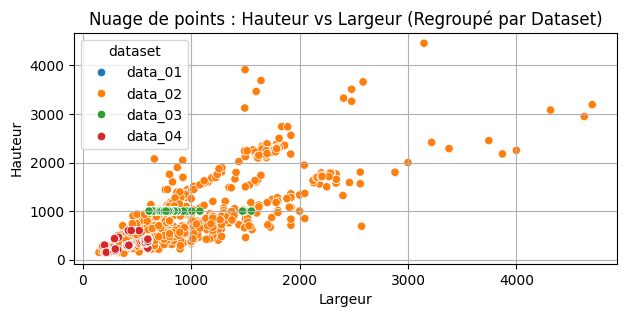

In [4]:

# Tracer un nuage de points en utilisant seaborn
plt.figure(figsize=(7, 3))
sns.scatterplot(x='width', y='height', hue='dataset', data=df)

# Ajouter des titres
plt.title('Nuage de points : Hauteur vs Largeur (Regroupé par Dataset)')
plt.xlabel('Largeur')
plt.ylabel('Hauteur')

# Afficher le graphique
plt.grid(True)
plt.show()


Dans le data_03, toutes les images ont une hauteur de 1000 pixels.
Dans le data_02, nous observons une distribution plus large, avec différentes tailles allant de L : [100,4800] pixels pour les largeurs et les hauteurs sont similaires.
Quant au data_04, les hauteurs et les largeurs ne dépassent pas 1000 pixels.

# La distribution des hauteurs et des largeurs par rappot à l'origine de la DATA

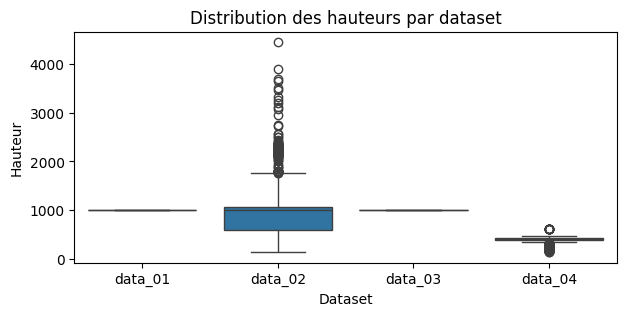

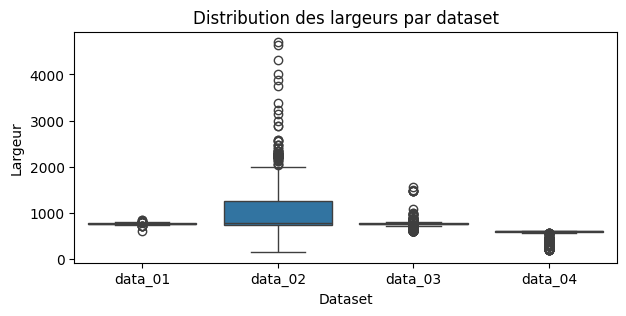

In [5]:

# Tracer la distribution des hauteurs par rapport à la colonne dataset
plt.figure(figsize=(7, 3))
sns.boxplot(data=df, x='dataset', y='height')
plt.title('Distribution des hauteurs par dataset')
plt.xlabel('Dataset')
plt.ylabel('Hauteur')
plt.show()

# Tracer la distribution des largeurs par rapport à la colonne dataset
plt.figure(figsize=(7, 3))
sns.boxplot(data=df, x='dataset', y='width')
plt.title('Distribution des largeurs par dataset')
plt.xlabel('Dataset')
plt.ylabel('Largeur')
plt.show()

Concernant le data_01, on remarque que la distribution des largeurs et des hauteurs ne dépasse pas 1000 pixels.
Dans le data_02, la distribution des hauteurs est principalement inférieure à 1100 pixels.
Dans a data_04 les images sont plus petite avec quelques valeurs aberrantes qui donne des images trop petites. 

# Distibution de flou dans la base de données

C:\Users\ayoub\AppData\Local\Temp\ipykernel_36612\1633061721.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='dataset', y='bluriness', data=df, palette='Set3')


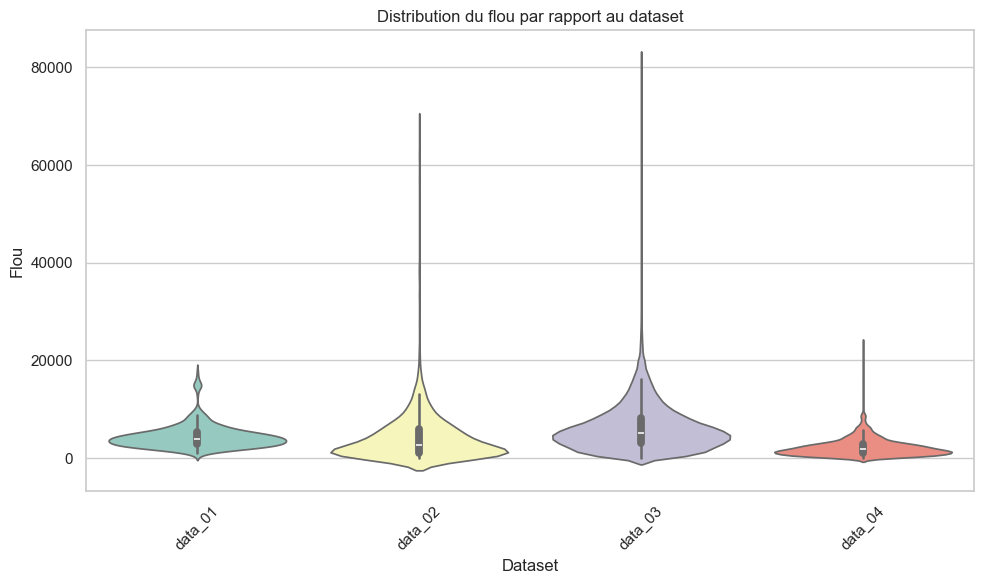

In [15]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='dataset', y='bluriness', data=df, palette='Set3')
plt.title('Distribution du flou par rapport au dataset')
plt.xlabel('Dataset')
plt.ylabel('Flou')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Il est remarquable que dans les data_02 et data_03, il existe des valeurs aberrantes dépassant 6000. Cependant, la majorité des images dans tous les ensembles de données ont un taux de flou qui ne dépasse pas 2000.

# Graphique nombre d'image par catégorie

Uniformisation des noms des classes. 

In [18]:
df['label'] = df['label'].replace({'facture': 'Facture', 'invoice': 'Facture', 'Invoice': 'Facture'})
df['label'] = df['label'].replace({'id_pieces': 'id_pieces', 'national_identity_card': 'id_pieces'})

df['label'].unique()

array(['Facture', 'id_pieces', 'justif_domicile', 'passeport', 'paye',
       'carte postale', 'rrc.cvc', 'form', 'scientific_publication',
       'advertisement', 'letter', 'resume', 'specification',
       'handwritten', 'memo', 'budget', 'news_article', 'presentation',
       'file_folder', 'scientific_report', 'email', 'questionnaire'],
      dtype=object)

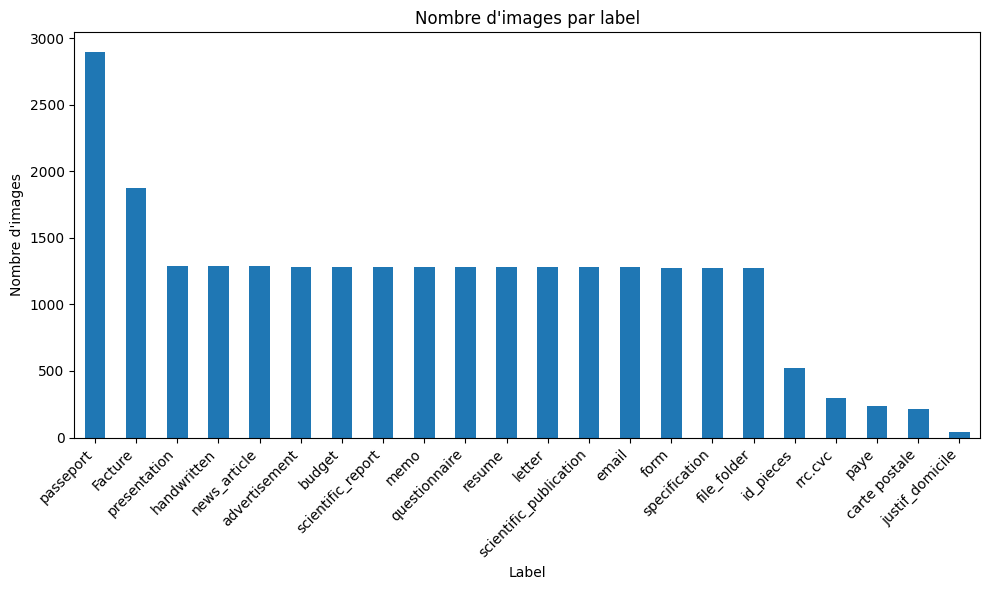

In [8]:

counts = df['label'].value_counts()

# Tracer l'histogramme
plt.figure(figsize=(10, 6))
counts.plot(kind='bar')
plt.title('Nombre d\'images par label')
plt.xlabel('Label')
plt.ylabel('Nombre d\'images')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

On observe ici une prédominance de la classe "passeport" avec environ 2800 occurrences, suivie par la classe "Facture" avec environ 1800 occurrences. En revanche, la classe "justif_domicile" est peu représentée dans notre ensemble de données.

# Disribution des pixels par image par catégorie pour chaque dataset

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


C:\Users\ayoub\AppData\Local\Temp\ipykernel_36612\3688755376.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=90)


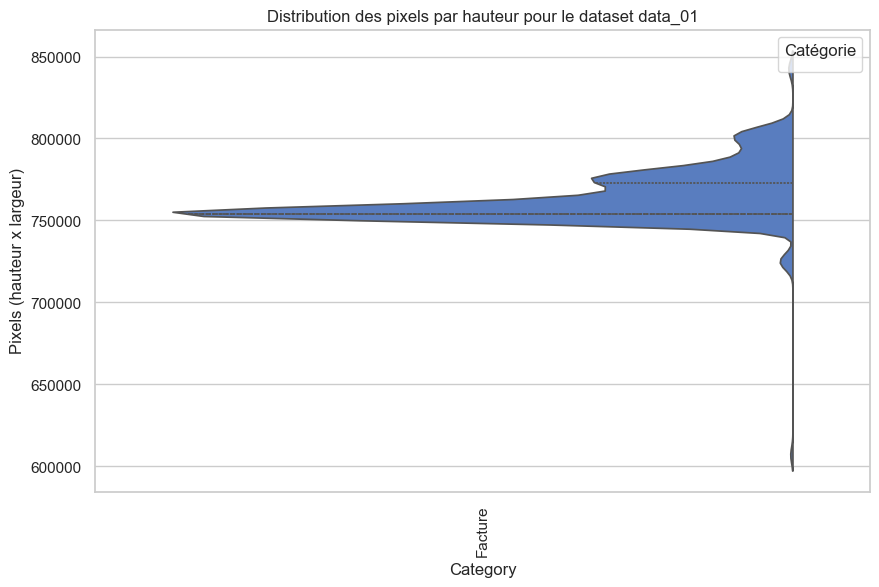

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\ayoub\AppData\Local\Temp\ipykernel_36612\3688755376.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=90)


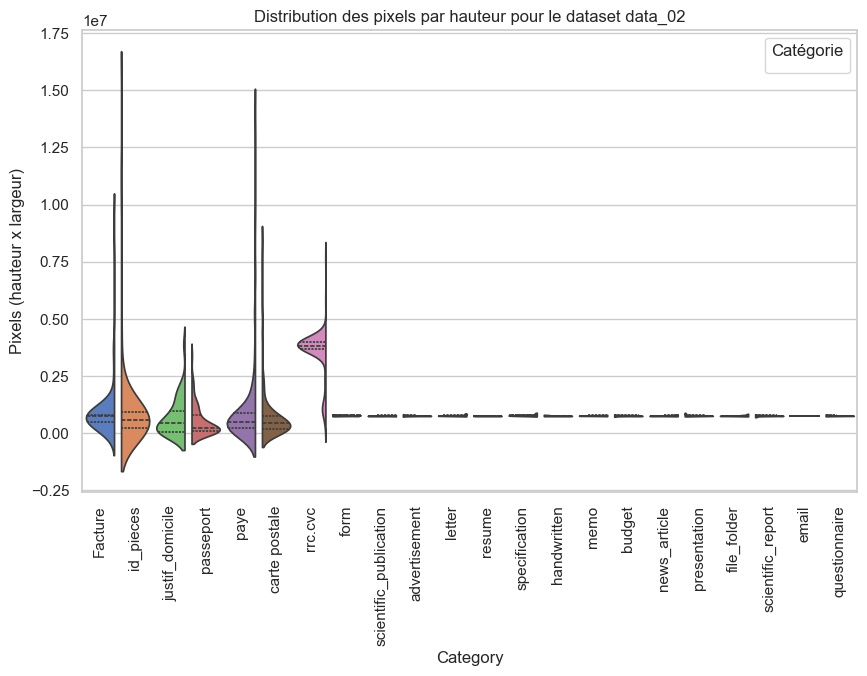

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\ayoub\AppData\Local\Temp\ipykernel_36612\3688755376.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=90)


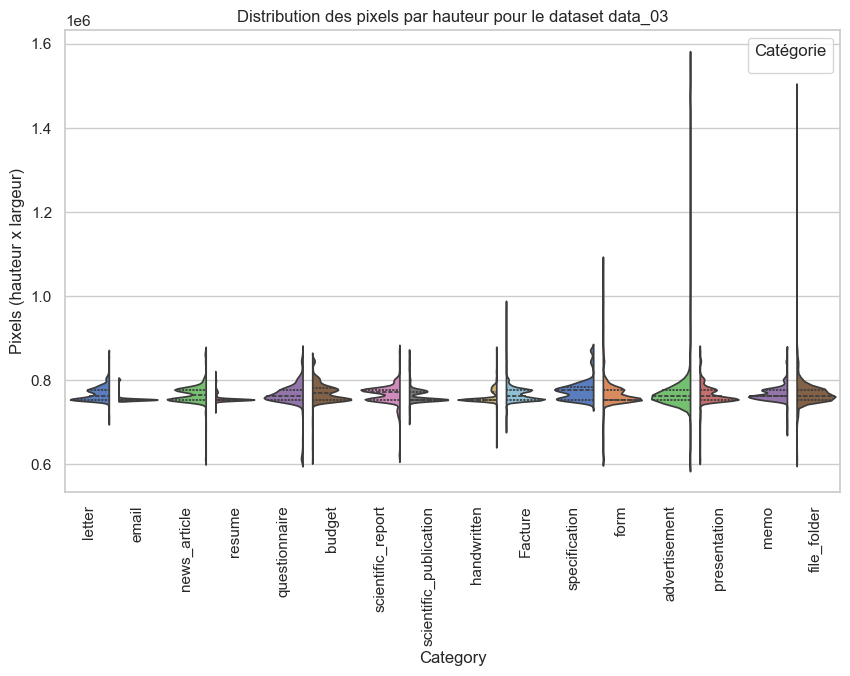

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\ayoub\AppData\Local\Temp\ipykernel_36612\3688755376.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=90)


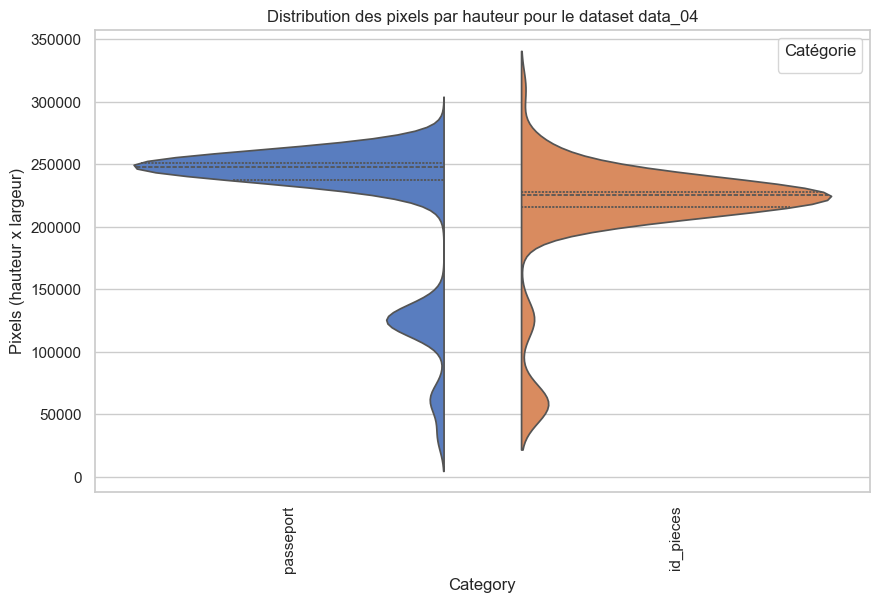

In [17]:
# Groupement par dataset
datasets = df.groupby('dataset')

# Création des sous-dataframes pour chaque dataset
dfs_by_dataset = {dataset: group for dataset, group in datasets}

# Création des graphiques violine pour chaque dataset
for dataset, dataset_df in dfs_by_dataset.items():
    plt.figure(figsize=(10, 6))
    dataset_df['pixels'] = dataset_df['height'] * dataset_df['width']  # Ajout de la colonne pixels
    ax = sns.violinplot(data=dataset_df, x='label', y='pixels', hue='label', split=True, inner="quart", palette="muted")
    plt.title(f'Distribution des pixels par hauteur pour le dataset {dataset}')
    plt.xlabel('Category')
    plt.ylabel('Pixels (hauteur x largeur)')
    plt.legend(title='Catégorie')
    labels = dataset_df['label'].unique()
    ax.set_xticklabels(labels, rotation=90)
    plt.show()

- Dans le jeu de données data_01, la distribution est moins étendue.
- Dans le dataset n°3, nous avons deux catégories présentant des valeurs aberrantes, notamment "advertisement" et "file_folder".
- Toujours dans le data_02, certaines catégories présentent des images de taille uniforme, telles que ('form', 'scientific_publication', 'advertisement', 'letter', 'resume', 'specification', 'handwritten', 'memo', 'budget', 'news_article', 'presentation', 'file_folder', 'scientific_report', 'email', 'questionnaire).
- Dans le jeu de donnée data_02 nous avons des valeurs aberrante importante au niveau des catégories : Facture, id_pieces, paye et carte_postale 